In [3]:
import mglearn

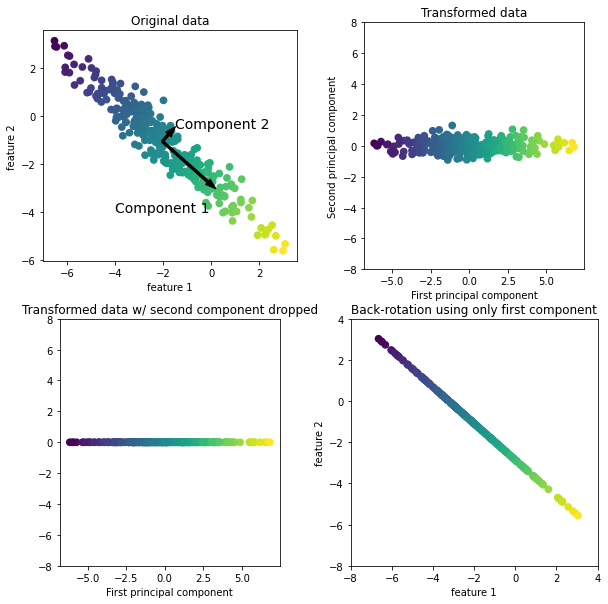

In [4]:
mglearn.plots.plot_pca_illustration()

In [5]:
### 한글 폰트 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import matplotlib

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

matplotlib.rcParams['axes.unicode_minus'] = False

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import numpy as np

In [7]:
cancer = load_breast_cancer()

In [8]:
malignant = cancer.data[cancer.target == 1]
benign = cancer.data[cancer.target == 0]

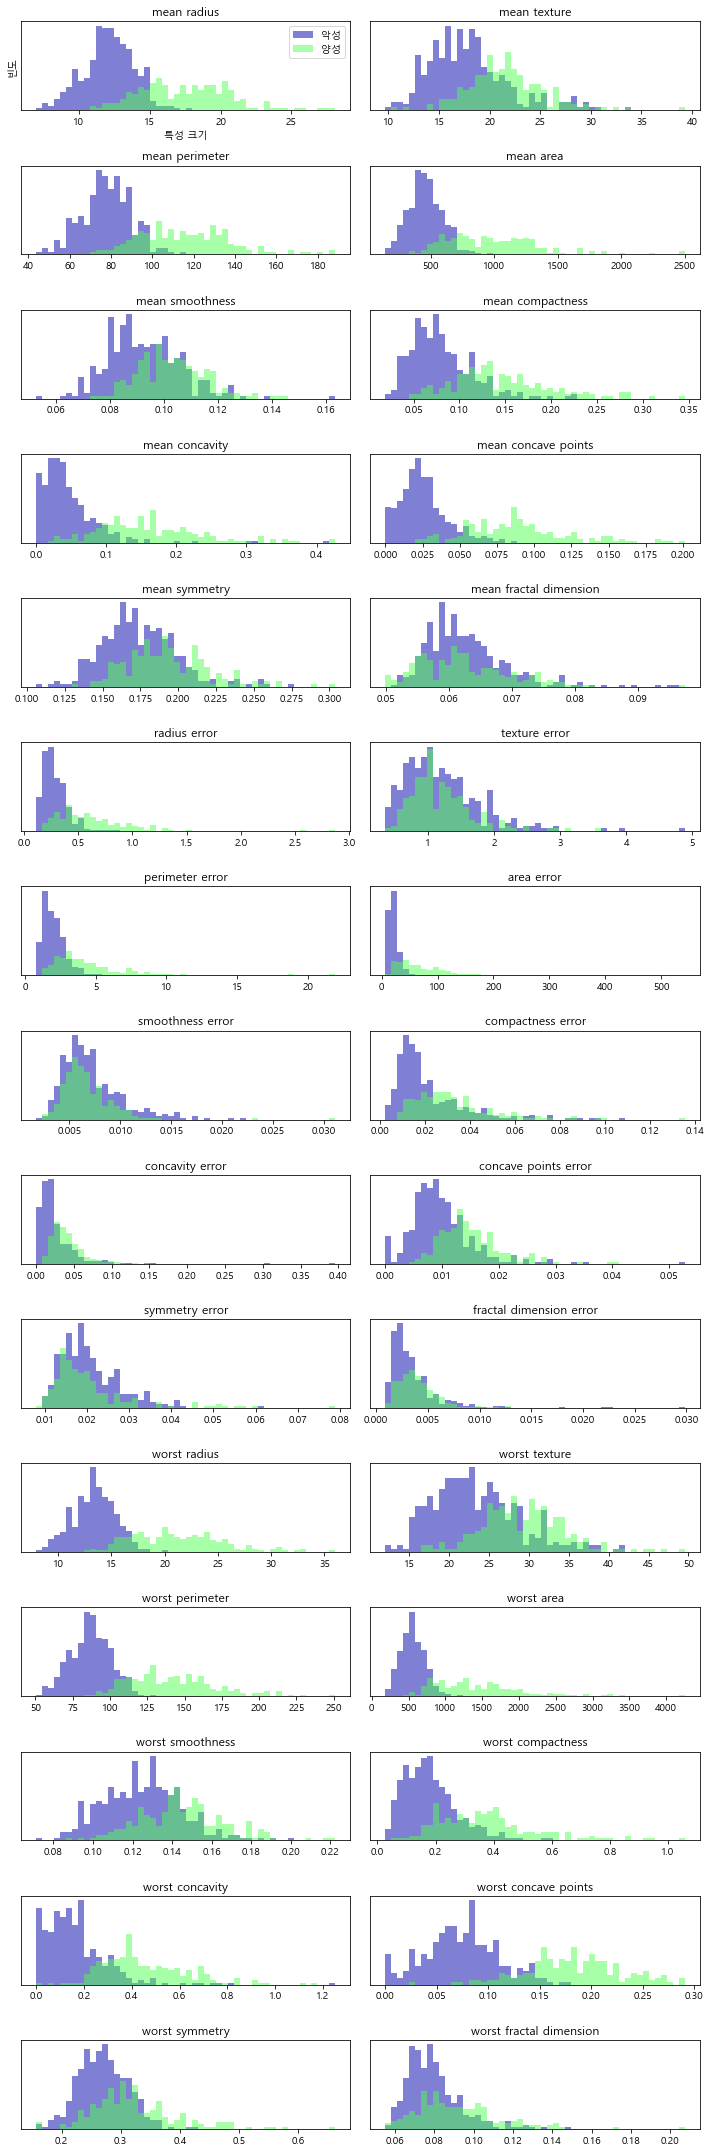

In [9]:
fig, axes = plt.subplots(15, 2, figsize=(10, 30))
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [12]:
# 데이터의 처음 두 개 주성분만 유지
pca = PCA(n_components=2)

# 유방암 데이터로 PCA 모델을 생성
pca.fit(X_scaled)

# 주어진 PCA 이용하여 두 개의 주성분을 가져온다.
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, '두 번째 주성분')

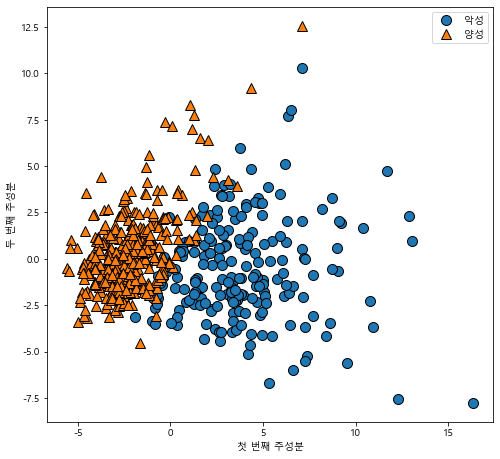

In [13]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 표시
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [14]:
print("PCA 주성분 형태 ", pca.components_.shape)
print("PCA 주성분 :", pca.components_) # 두개의 주성분에 대한 결합- 회귀 계수

PCA 주성분 형태  (2, 30)
PCA 주성분 : [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, '주성분')

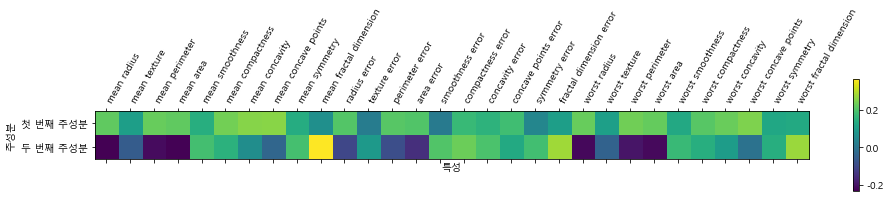

In [15]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

In [16]:
pca = PCA(n_components=5)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)

Text(0, 0.5, '주성분')

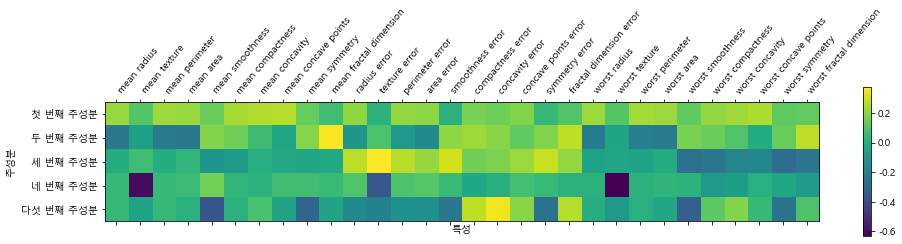

In [17]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3, 4], ["첫 번째 주성분", "두 번째 주성분",
                             "세 번째 주성분", "네 번째 주성분",
                             "다섯 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, 
           rotation=50, 
           ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

In [18]:
from sklearn.decomposition import PCA
import seaborn as sns

In [19]:
iris = sns.load_dataset("iris")

X_iris = iris.drop("species", axis=1)
y_iris = iris['species']

print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


In [22]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [23]:
model = PCA()

In [24]:
X_pca_dat = model.fit_transform(X_iris)

In [25]:
X_pca_dat.shape

(150, 4)

In [26]:
type(X_pca_dat)

numpy.ndarray

In [27]:
X_pca_dat[0:4]

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02]])

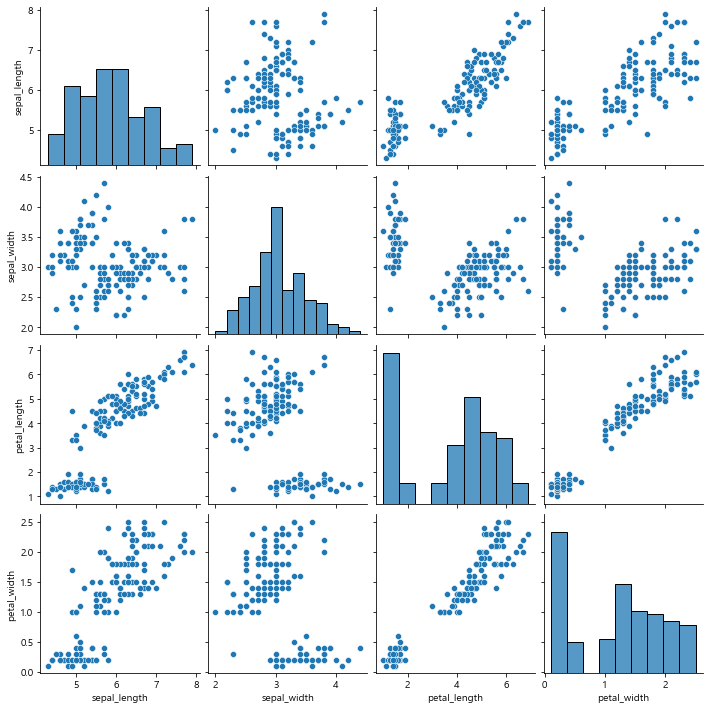

In [28]:
sns.pairplot(iris)

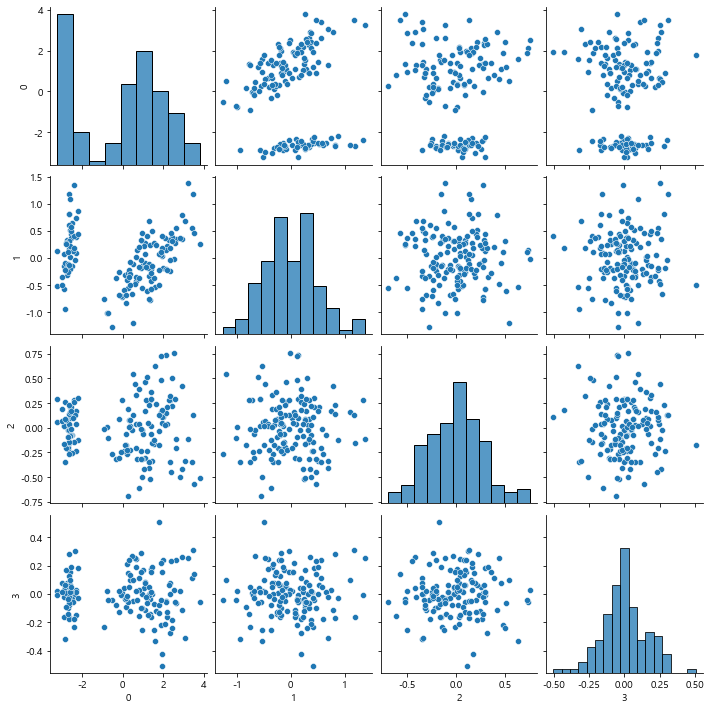

In [30]:
import pandas as pd
df = pd.DataFrame(X_pca_dat[0:,0:])
sns.pairplot(df)

In [31]:
pca = PCA(n_components=2)
two = pca.fit_transform(X_iris)

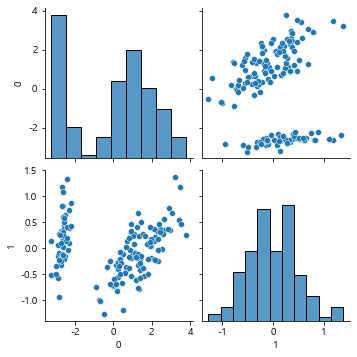

In [34]:
df = pd.DataFrame(two)
sns.pairplot(df)

In [35]:
df.head()

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


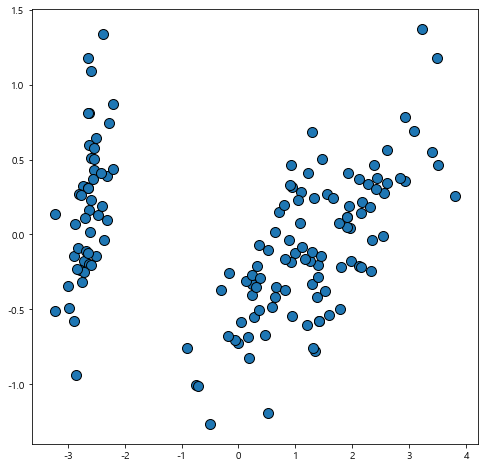

In [32]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(two[:, 0], two[:, 1])

In [36]:
df.corr()

,0,1
0,1.000000e+00,-4.339976e-17
1,-4.339976e-17,1.000000e+00


In [37]:
iris['PCA1'] = df.iloc[:,0]  # feature 생성
iris['PCA2'] = df.iloc[:,1]  # feature 생성
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


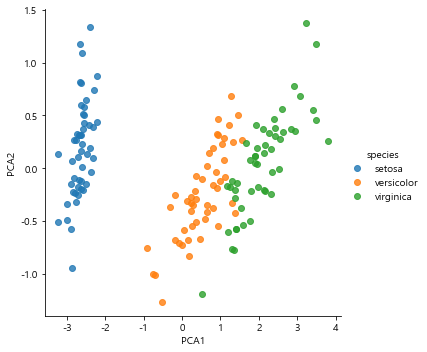

In [38]:
sns.lmplot('PCA1', 'PCA2', hue="species", data=iris, fit_reg=False)

In [43]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])